[View in Colaboratory](https://colab.research.google.com/github/seraffin/FailOmen/blob/master/Pola/Workspace_1_workingNN.ipynb)

In [0]:
import tensorflow as tf

# Helper libraries
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
!ls

convertDataToML.csv  gdrive  sample_data


In [0]:
import pandas as pd

#Importing dataset
dataset = pd.read_csv('convertDataToML.csv', index_col=False)

In [0]:
x = dataset.iloc[:, 0:23739].values
y = dataset.iloc[:, 23739:24281].values

In [7]:
y.shape

(4813, 542)

In [8]:
failCount = 0
passCount = 0
failBuildCount = 0

for a in y:
  if a[np.argmin(a)] == 0 : failBuildCount += 1
  for b in a:
    if b == 0 : failCount += 1
    if b == 1 : passCount += 1
print (failBuildCount)
print (failCount)
print (passCount)
print (failCount / passCount * 100, '%', sep='')

632
973
2607673
0.037312960635785236%


## **utilities:**


---

In [0]:
def count_distribution(prediction):
  #Distributions of argmins through all the predictions
  i = 1
  tab = [0] * 542
  for a in predictions:
    j = 0
    for b in a:
      if b < 1.0 : j = j + 1

    #print (i, '. ', j, np.argmin(a))
    tab[np.argmin(a)] += 1
    i = i + 1

  i = 0
  distributed_array = []
  for a in tab:
    if a > 0 : 
      print ('position', i, '\targmin count', a)
      distributed_array.append((i,a))
    i += 1
  create_plot(distributed_array)  
  return distributed_array


In [0]:
def create_plot(x_data, y_data=0):
  import matplotlib.pyplot as plt
  if y_data == 0:  
    unzip = list(zip(*x_data))
    x_data, y_data = unzip[0],unzip[1]
  plt.bar(x_data, y_data,width=10)
  plt.xlabel("test no")
  plt.ylabel("how many times test was predicted as the best to use")
  plt.show()

In [0]:
def searchForFailed(yList):
  changedRowList = []
  for row in range (len(yList)):
    if 0 in yList[row]:
      changedRowList.append(row)
  return changedRowList

def returnFailedData(xList, yList, changedRowList):
  xFailed = []
  yFailed = []
  
  for row in changedRowList:
    xFailed.append(xList[row])
    yFailed.append(yList[row])
  xFailed = np.array(xFailed)
  yFailed = np.array(yFailed)
  return xFailed, yFailed

In [0]:
def failsCount():
  fala = 0
  for i, a in enumerate(yTest):
    j = 0
    for k, b in enumerate(a):
      if b < 1.0 : j += 1

    if j > 0 : 
      print (i, '. ', j)
    i = i + 1
    fala += j
  print (fala)

In [0]:
# Evaluation function

def evaluation(additionalPredictions, refYsupervisor):
  
  lenght = len(refYsupervisor)

  failPositions = [[] for y in range(lenght)]

  for i, a in enumerate(refYsupervisor):

    for j, b in enumerate(a):
      if b == 0 : failPositions[i].append(j);

  predictionsTemp = predictions.copy()
  predictionPositions = [[] for y in range(lenght)]


  for i, a in enumerate(predictionsTemp):

    if len(failPositions[i]) != 0:
      for j in range(len(failPositions[i]) + additionalPredictions):
        argmin = np.argmin(a)
        predictionPositions[i].append(argmin)
        predictionsTemp[i][argmin] = 1

  predictionHits = [[] for y in range(lenght)]

  for i, a in enumerate(failPositions):
    count = 0
    for j, b in enumerate(a):


      for c in predictionPositions[i]:
  #      predictionHits[i].append(predictions[i][c].copy())
  #      print(predictions[i][c])
  #      print(predictions[i][c])
  #      print (b, c)
        if c == b : count += 1

    if len(failPositions) != 0:
      predictionHits[i].insert(0,count)


  failsCount = 0
  hitsCount = 0
  for i, a in enumerate(refYsupervisor):
    j = 0

    for k, b in enumerate(a):
      if b < 1.0 : j += 1

  #  if j > 0 :
  #    print (i, '.', j, predictionHits[i])


    failsCount += j
    hitsCount += predictionHits[i][0]

  print('Percentage of fails predicted', hitsCount / failsCount * 100, '%')



---



---



---



## **PREPARE DATA**

In [0]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#y = labelencoder.fit_transform(y)

In [0]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2)

**(optional) create only 'failed data'**

In [0]:
xReduced, yReduced = returnFailedData(x, y, searchForFailed(y))
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(xReduced, yReduced, test_size = 0.2)



---



---



---



## PREPARE MODEL

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
#12140
model = Sequential()
# Adding the input layer and the first hidden layer
model.add(Dense(6070, activation="sigmoid", input_dim=23739, kernel_initializer="uniform")) # TRY smaller input_dim value or less neurons
# Adding the second hidden layer
#model.add(Dense(12140, activation = "sigmoid", kernel_initializer="uniform"))
# Adding the output layer
model.add(Dense(542, activation="sigmoid", kernel_initializer="uniform"))

In [0]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(xTrain, yTrain, batch_size = 20, epochs = 15)



---



---



---



## **TEST MODEL**

In [18]:
lossTest, accTest = model.evaluate(xTest, yTest)

print('Test accuracy:', accTest)
print('Test loss:', lossTest)


127/127 [==============================] - 0s 739us/step
Test accuracy: 0.9966731489174009
Test loss: 0.030737722571205904


In [0]:
# (opcjonalnie) jezeli uruchomione siec sprawdzac danymi 'sfailowanymi'
xReduced, yReduced = returnFailedData(x, y, searchForFailed(y))

In [0]:

#choose one

# predictions = model.predict(xTest)
predictions = model.predict(xReduced)

In [0]:
#Distributions of argmins through all the predictions
distribution_array = count_distribution(predictions)



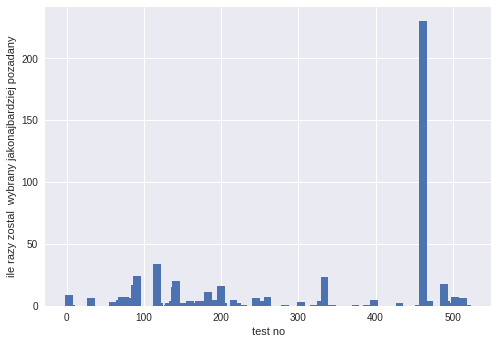

In [103]:
create_plot(distribution_array)

In [23]:


evaluation(15,yReduced )


Percentage of fails predicted 56.11510791366906 %
